# Introducción

En esta práctica vamos a repasar diferentes tests estadísticos. Para ello nos ayudamos de los datos publicados por BCSC:
*NCI-funded Breast Cancer Surveillance Consortium (P01 CA154292 and HHSN261201100031C). Downloaded mm/dd/yyyy from the Breast Cancer Surveillance Consortium Web site - http://www.bcsc-research.org/data/index.html.*

Concretamente a través de este enlace:
http://www.bcsc-research.org/data/rf/app2/DownloadRequest.aspx


El fichero *BCSC_risk_factors_summarized.csv* descargado lo teneis en la carpeta *data*.

Ese fichero es un CSV, la descripción de cada columna se puede ver en la siguiente tabla:


| Nombre de variable | Descripción | Código | 
|-|-|-|
| year | Año de la observación | Numérico, 2000-2009 |
| year_group_5_years| Edad (años) en grupos de 5 años |  1 = Edad 18-29;  2 = Edad 30-34; 3 = Edad 35-39; 4 = Edad 40-44; 5 = Edad 45-49; 6 = Edad 50-54; 7 = Edad 55-59; 8 = Edad 60-64; 9 = Edad 65-69; 10 = Edad 70-74; 11 = Edad 75-79; 12 = Edad 80-84; 13 = Edad ≥85 |
| race_eth | Grupo étnico | 1 = Non-Hispanic white; 2 = Non-Hispanic black; 3 = Asian/Pacific Islander; 4 = Native American; 5 = Hispanic; 6 = Other/mixed; 9 = Desconocido |
| first_degree_hx | Historial de cancer de un familiar de primer grado | 0 = No; 1 = Sí; 9 = Desconocido |
| Edad_menarche | Edad (años) at menarche |0 = Edad ≥14; 1 = Edad 12-13; 2 = Edad <12; 9 = Desconocido
| Edad_first_birth | Edad (años) at first birth | 0 = Edad < 20; 1 = Edad 20-24; 2 = Edad 25-29; 3 = Edad ≥30; 4 = Nulliparous; 9 = Desconocido |
| BIRADS_breast_density | BI-RADS densidad del cancer de pecho| 1 = Almost entirely fat; 2 =Scattered fibroglandular densities; 3 = Heterogeneously dense; 4 = Extremely dense; 9 = Desconocido |
| current_hrt | Uso de terapia de hormonas de reemplazo | 0 = No; 1 = Sí; 9 = Desconocido |
| menopaus | Menopausal status | 1 = Pre- or peri-menopausal; 2 = Post-menopausal; 3 = Surgical menopause; 9 = Desconocido |
| bmi_group |  Body mass index | 1 = 10-24.99; 2 = 25-29.99; 3 = 30-34.99; 4 = 35 or more; 9 = Desconocido |
| biophx | Biopsia previa o aspiración | 0 = No; 1 = Sí; 9 = Desconocido |
| breast_cancer_history | Cancer diagnosticado con anterioridad | 0 = No; 1 = Sí; 9 = Desconocido |
| count | Número de ocurrencias de estas covariables | Numérico|




Leemos los datos del csv y los adaptamos. Pasos a seguir:
1. Replicamos las filas indicadas por la columna *count*
2. Los datos son muy grandes, para agilizar la práctica nos quedamos con 5000 muestras elegidas con muestreo aleatorio simple. El resto se puede descartar.
3. Se adapta el resto

In [1]:
# Cargamos los datos
factoresRiesgo <- read.csv("datos/BCSC_risk_factors_summarized.csv", sep = ",")

head(factoresRiesgo, n = 3)
str(factoresRiesgo)

#Replicamos las filas
factoresRiesgoReplicados <- factoresRiesgo[rep(row.names(factoresRiesgo), factoresRiesgo$count),]

str(factoresRiesgoReplicados)

year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
2000,1,1,0,0,0,1,0,1,3,0,0,1
2000,1,1,0,0,1,3,0,1,2,0,0,1
2000,1,1,0,0,1,4,0,1,1,0,0,2


'data.frame':	1144564 obs. of  13 variables:
 $ year                 : int  2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 ...
 $ age_group_5_years    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ race_eth             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ first_degree_hx      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ age_menarche         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ age_first_birth      : int  0 1 1 2 2 4 9 9 9 9 ...
 $ BIRADS_breast_density: int  1 3 4 3 3 9 2 3 3 4 ...
 $ current_hrt          : int  0 0 0 0 0 0 0 0 9 0 ...
 $ menopaus             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ bmi_group            : int  3 2 1 1 1 1 9 1 1 1 ...
 $ biophx               : int  0 0 0 0 1 0 0 0 0 0 ...
 $ breast_cancer_history: int  0 0 0 0 9 0 0 0 0 0 ...
 $ count                : int  1 1 2 1 1 1 2 2 1 2 ...
'data.frame':	6318638 obs. of  13 variables:
 $ year                 : int  2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 ...
 $ age_group_5_years    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ race_eth             :

El número de filas tras replicar las filas indicadas por la columna *count* es de 6318638. Como este número es muy alto para la máquina virtual que tenemos vamos a realizar una muestreo aleatorio simple y nos quedaremos con 5000 filas. El resto se descartan.

*Nota:*Para el muestreo usad la semilla 12345, de esta forma todos tendresmos exactamente los mismos resultados.

In [20]:
#Definimos una semilla común para todos:
set.seed(12345)
#Utiliza muestreo aleatorio simple para quedarnos con 5000 muestras:

# Tomamos una muestra de tamaño 5000
muestraFactoresRiesgo <- factoresRiesgoReplicados[sample(nrow(factoresRiesgoReplicados), 5000),]

str(muestraFactoresRiesgo)

'data.frame':	5000 obs. of  13 variables:
 $ year                 : int  2006 2008 2007 2008 2004 2001 2002 2004 2006 2009 ...
 $ age_group_5_years    : int  8 7 5 8 3 6 10 6 9 10 ...
 $ race_eth             : int  9 2 1 1 1 5 1 9 9 1 ...
 $ first_degree_hx      : int  9 0 0 1 0 0 0 9 0 9 ...
 $ age_menarche         : int  9 9 9 1 9 9 9 9 9 2 ...
 $ age_first_birth      : int  9 9 9 1 9 9 9 9 1 9 ...
 $ BIRADS_breast_density: int  2 2 2 2 3 1 9 9 1 2 ...
 $ current_hrt          : int  9 0 0 0 0 1 0 9 0 0 ...
 $ menopaus             : int  2 2 1 2 1 2 2 9 2 2 ...
 $ bmi_group            : int  9 9 9 2 2 3 2 9 9 2 ...
 $ biophx               : int  0 0 0 0 0 0 0 9 0 0 ...
 $ breast_cancer_history: int  0 0 0 0 0 0 0 9 0 0 ...
 $ count                : int  218 771 877 32 97 11 148 5518 24 1 ...


Formatear el dataframe:
* Cambiamos los *Desconocido* por NA en las columnas "race_eth", "first_degree_hx", "age_menarche", "age_first_birth", "BIRADS_breast_density", "current_hrt", "menopaus", "bmi_group", "biophx", "breast_cancer_history"
* Convertimos a factores las columnas que vamos a necesitar

In [21]:
head(muestraFactoresRiesgo, 5)

# Sustituimos los 9s por NAs
muestraFactoresRiesgo$race_eth[muestraFactoresRiesgo$race_eth == 9] <- NA
muestraFactoresRiesgo$first_degree_hx[muestraFactoresRiesgo$first_degree_hx == 9] <- NA
muestraFactoresRiesgo$age_menarche[muestraFactoresRiesgo$age_menarche == 9] <- NA
muestraFactoresRiesgo$age_first_birth[muestraFactoresRiesgo$age_first_birth == 9] <- NA
muestraFactoresRiesgo$BIRADS_breast_density[muestraFactoresRiesgo$BIRADS_breast_density == 9] <- NA
muestraFactoresRiesgo$current_hrt[muestraFactoresRiesgo$current_hrt == 9] <- NA
muestraFactoresRiesgo$menopaus[muestraFactoresRiesgo$menopaus == 9] <- NA
muestraFactoresRiesgo$bmi_group[muestraFactoresRiesgo$bmi_group == 9] <- NA
muestraFactoresRiesgo$biophx[muestraFactoresRiesgo$biophx == 9] <- NA
muestraFactoresRiesgo$breast_cancer_history[muestraFactoresRiesgo$breast_cancer_history == 9] <- NA

head(muestraFactoresRiesgo, 5)

# Convertimos los valores numéricos a factores
muestraFactoresRiesgo$race_eth <- factor(muestraFactoresRiesgo$race_eth,
    labels = c("Non-Hispanic white", 
               "Non-Hispanic black", 
               "Asian/Pacific Islander",
               "Native American", 
               "Hispanic", 
               "Other/mixed"))
muestraFactoresRiesgo$first_degree_hx <- factor(muestraFactoresRiesgo$first_degree_hx,
    labels=c("No", "Sí"))
muestraFactoresRiesgo$BIRADS_breast_density <- factor(muestraFactoresRiesgo$BIRADS_breast_density,
    labels=c("Almost entirely fat",
             "Scattered fibroglandular densities",
             "Heterogeneously dense",
             "Extremely dense"))
muestraFactoresRiesgo$current_hrt <- factor(muestraFactoresRiesgo$current_hrt,
    labels=c("No", "Sí"))
muestraFactoresRiesgo$menopaus <- factor(muestraFactoresRiesgo$menopaus,
    labels=c("Pre- or peri-menopausal",
             "Post-menopausal",
             "Surgical menopause"))
muestraFactoresRiesgo$bmi_group <- factor(muestraFactoresRiesgo$bmi_group,
    labels=c("10-24.99",
             "25-29.99",
             "30-34.99",
             "35 or more"))
muestraFactoresRiesgo$biophx <- factor(muestraFactoresRiesgo$biophx,
    labels=c("No", "Sí"))
muestraFactoresRiesgo$breast_cancer_history <- factor(muestraFactoresRiesgo$breast_cancer_history,
    labels=c("No", "Sí"))

# Convertimos rangos de edades en factores
muestraFactoresRiesgo$age_menarche <- factor(muestraFactoresRiesgo$age_menarche,
    labels=c("Edad ≥14",
             "Edad 12-13",
             "Edad <12"))
muestraFactoresRiesgo$age_first_birth <- factor(muestraFactoresRiesgo$age_first_birth,
    labels=c("Edad < 20",
             "Edad 20-24",
             "Edad 25-29",
             "Edad ≥30",
             "Nulliparous"))

head(muestraFactoresRiesgo, 5)
str(muestraFactoresRiesgo)

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
792997.89,2006,8,9,9,9,9,2,9,2,9,0,0,218
986739.194,2008,7,2,0,9,9,2,0,2,9,0,0,771
845393.799,2007,5,1,0,9,9,2,0,1,9,0,0,877
996805.11,2008,8,1,1,1,1,2,0,2,2,0,0,32
481428.71,2004,3,1,0,9,9,3,0,1,2,0,0,97


,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
792997.89,2006,8,NA,NA,NA,NA,2,NA,2,NA,0,0,218
986739.194,2008,7,2,0,NA,NA,2,0,2,NA,0,0,771
845393.799,2007,5,1,0,NA,NA,2,0,1,NA,0,0,877
996805.11,2008,8,1,1,1,1,2,0,2,2,0,0,32
481428.71,2004,3,1,0,NA,NA,3,0,1,2,0,0,97


,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
792997.89,2006,8,NA,NA,NA,NA,Scattered fibroglandular densities,NA,Post-menopausal,NA,No,No,218
986739.194,2008,7,Non-Hispanic black,No,NA,NA,Scattered fibroglandular densities,No,Post-menopausal,NA,No,No,771
845393.799,2007,5,Non-Hispanic white,No,NA,NA,Scattered fibroglandular densities,No,Pre- or peri-menopausal,NA,No,No,877
996805.11,2008,8,Non-Hispanic white,Sí,Edad 12-13,Edad 20-24,Scattered fibroglandular densities,No,Post-menopausal,25-29.99,No,No,32
481428.71,2004,3,Non-Hispanic white,No,NA,NA,Heterogeneously dense,No,Pre- or peri-menopausal,25-29.99,No,No,97


'data.frame':	5000 obs. of  13 variables:
 $ year                 : int  2006 2008 2007 2008 2004 2001 2002 2004 2006 2009 ...
 $ age_group_5_years    : int  8 7 5 8 3 6 10 6 9 10 ...
 $ race_eth             : Factor w/ 6 levels "Non-Hispanic white",..: NA 2 1 1 1 5 1 NA NA 1 ...
 $ first_degree_hx      : Factor w/ 2 levels "No","Sí": NA 1 1 2 1 1 1 NA 1 NA ...
 $ age_menarche         : Factor w/ 3 levels "Edad ≥14","Edad 12-13",..: NA NA NA 2 NA NA NA NA NA 3 ...
 $ age_first_birth      : Factor w/ 5 levels "Edad < 20","Edad 20-24",..: NA NA NA 2 NA NA NA NA 2 NA ...
 $ BIRADS_breast_density: Factor w/ 4 levels "Almost entirely fat",..: 2 2 2 2 3 1 NA NA 1 2 ...
 $ current_hrt          : Factor w/ 2 levels "No","Sí": NA 1 1 1 1 2 1 NA 1 1 ...
 $ menopaus             : Factor w/ 3 levels "Pre- or peri-menopausal",..: 2 2 1 2 1 2 2 NA 2 2 ...
 $ bmi_group            : Factor w/ 4 levels "10-24.99","25-29.99",..: NA NA NA 2 2 3 2 NA NA 2 ...
 $ biophx               : Factor w/ 2 levels "

#### Edad y Antecedentes familiares

Creamos una nueva columna con la edad estimada para un posterior análisis

Representa en un diagrama de cajas cómo varía la **edad de aparición del cancer** en función de si ha habido **antecedentes familiares** o no.
Ayuda:
- Hay que crear una nueva columna con la edad estimada de cada rango.

In [24]:
# Creamos un vector con las edades estimadas para asignarlos en función del valor de cada registro del dataframe y la posición del vector
edadesEstimadas <- c(25,32,37,42,47,52,57,62,67,72,77,82,90)

# Creamos una nueva columna con la edad estimada para cada rango
muestraFactoresRiesgo$estimated_age <- edadesEstimadas[as.numeric(muestraFactoresRiesgo$age_group_5_years)]

head(muestraFactoresRiesgo, 5)
str(muestraFactoresRiesgo)


,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count,estimated_age
792997.89,2006,8,NA,NA,NA,NA,Scattered fibroglandular densities,NA,Post-menopausal,NA,No,No,218,62
986739.194,2008,7,Non-Hispanic black,No,NA,NA,Scattered fibroglandular densities,No,Post-menopausal,NA,No,No,771,57
845393.799,2007,5,Non-Hispanic white,No,NA,NA,Scattered fibroglandular densities,No,Pre- or peri-menopausal,NA,No,No,877,47
996805.11,2008,8,Non-Hispanic white,Sí,Edad 12-13,Edad 20-24,Scattered fibroglandular densities,No,Post-menopausal,25-29.99,No,No,32,62
481428.71,2004,3,Non-Hispanic white,No,NA,NA,Heterogeneously dense,No,Pre- or peri-menopausal,25-29.99,No,No,97,37


'data.frame':	5000 obs. of  14 variables:
 $ year                 : int  2006 2008 2007 2008 2004 2001 2002 2004 2006 2009 ...
 $ age_group_5_years    : int  8 7 5 8 3 6 10 6 9 10 ...
 $ race_eth             : Factor w/ 6 levels "Non-Hispanic white",..: NA 2 1 1 1 5 1 NA NA 1 ...
 $ first_degree_hx      : Factor w/ 2 levels "No","Sí": NA 1 1 2 1 1 1 NA 1 NA ...
 $ age_menarche         : Factor w/ 3 levels "Edad ≥14","Edad 12-13",..: NA NA NA 2 NA NA NA NA NA 3 ...
 $ age_first_birth      : Factor w/ 5 levels "Edad < 20","Edad 20-24",..: NA NA NA 2 NA NA NA NA 2 NA ...
 $ BIRADS_breast_density: Factor w/ 4 levels "Almost entirely fat",..: 2 2 2 2 3 1 NA NA 1 2 ...
 $ current_hrt          : Factor w/ 2 levels "No","Sí": NA 1 1 1 1 2 1 NA 1 1 ...
 $ menopaus             : Factor w/ 3 levels "Pre- or peri-menopausal",..: 2 2 1 2 1 2 2 NA 2 2 ...
 $ bmi_group            : Factor w/ 4 levels "10-24.99","25-29.99",..: NA NA NA 2 2 3 2 NA NA 2 ...
 $ biophx               : Factor w/ 2 levels "

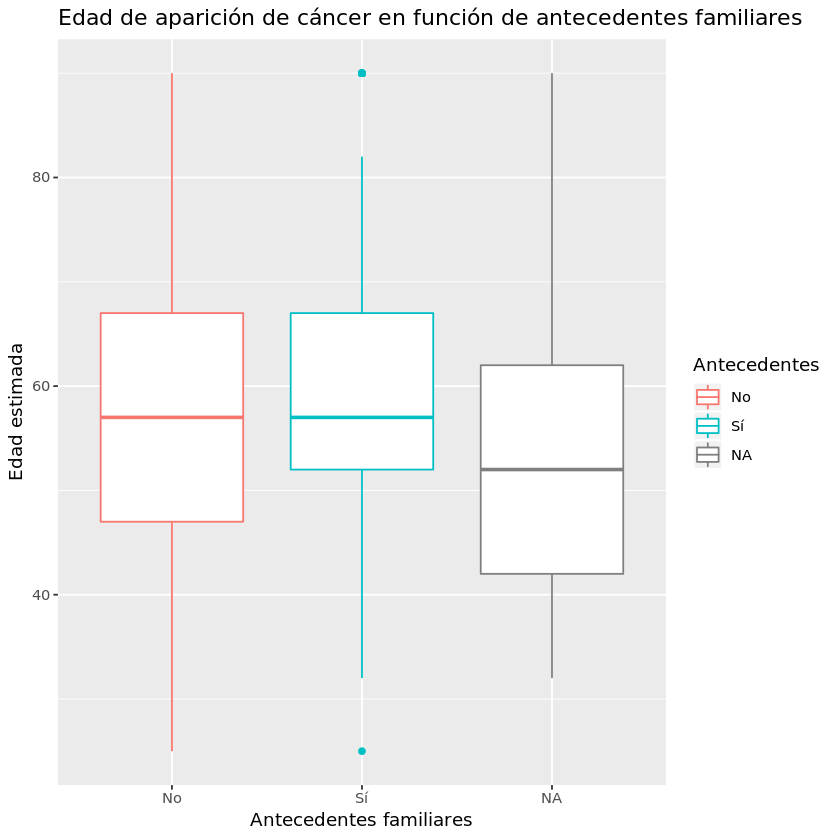

In [39]:
library("ggplot2")

ggplot(data = muestraFactoresRiesgo, aes(x = first_degree_hx, y = estimated_age, color = first_degree_hx)) +
    ggtitle("Edad de aparición de cáncer en función de antecedentes familiares") +
    scale_color_discrete(name = "Antecedentes") + 
    xlab("Antecedentes familiares") +
    ylab("Edad estimada") +
    geom_boxplot()

¿Existe una diferencia estadística significativa entre la edad de aparición del cancer y si hay antecedentes familiares? ¿Que test usarías para comprobarlo?

In [108]:
tablaEstimatedAgeAntecedentes <- table(muestraFactoresRiesgo$estimated_age, muestraFactoresRiesgo$first_degree_hx)
tablaEstimatedAgeAntecedentes

testEstimatedAgeAntecedentes <- chisq.test(tablaEstimatedAgeAntecedentes, simulate.p.value = T)
testEstimatedAgeAntecedentes

print(paste("Con un valor bajo de p-value", testEstimatedAgeAntecedentes$p.value, "podemos decir que no hay dependencia entre la edad de aparición del cáncer y que haya antecedentes familiares."))

    
      No  Sí
  25   8   1
  32  21   7
  37 113  19
  42 496  65
  47 576  92
  52 641 119
  57 541 107
  62 414  92
  67 339  76
  72 273  64
  77 195  45
  82 103  26
  90  54  24


	Pearson's Chi-squared test with simulated p-value (based on 2000
	replicates)

data:  tablaEstimatedAgeAntecedentes
X-squared = 33.296, df = NA, p-value = 0.001499


[1] "Con un valor bajo de p-value 0.00149925037481259 podemos decir que no hay dependencia entre la edad de aparición del cáncer y que haya antecedentes familiares."


Dibuja la curva de densidad de probabilidad de cómo varía la edad de aparición del cancer en función de si ha habido antecedentes familiares o no.

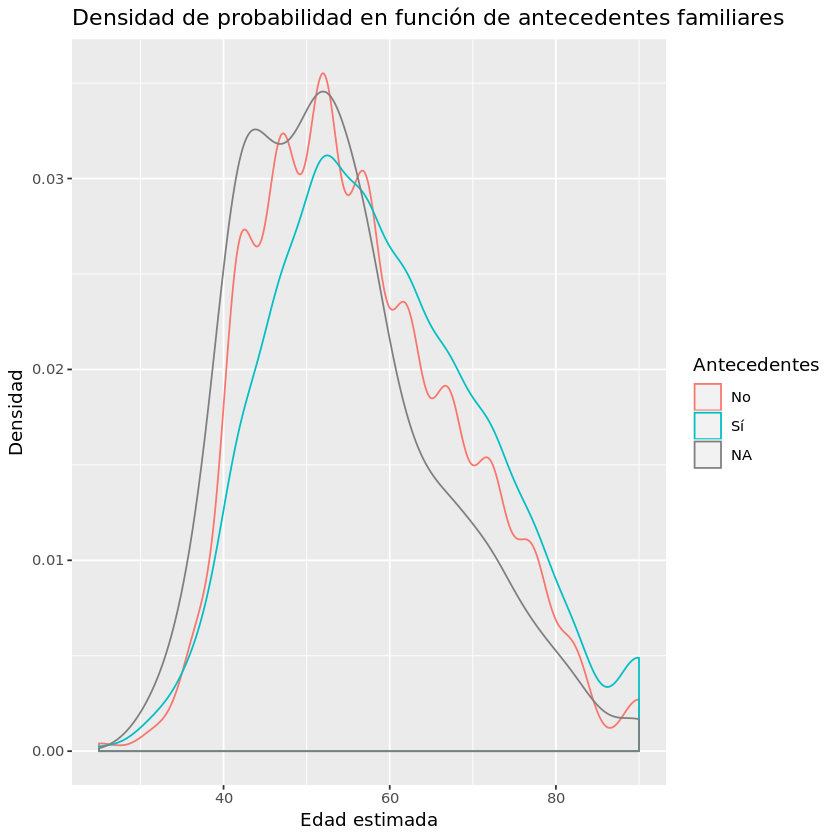

In [41]:
ggplot(data = muestraFactoresRiesgo, aes(x = estimated_age, colour = first_degree_hx)) +
    ggtitle("Densidad de probabilidad en función de antecedentes familiares") +
    scale_color_discrete(name = "Antecedentes") + 
    xlab("Edad estimada") +
    ylab("Densidad") +
    geom_density()

#### Edad y BIRADS

Representa en un diagrama de cajas cómo varía la edad de aparición del cáncer en función de la densidad del cáncer (BIRADS).

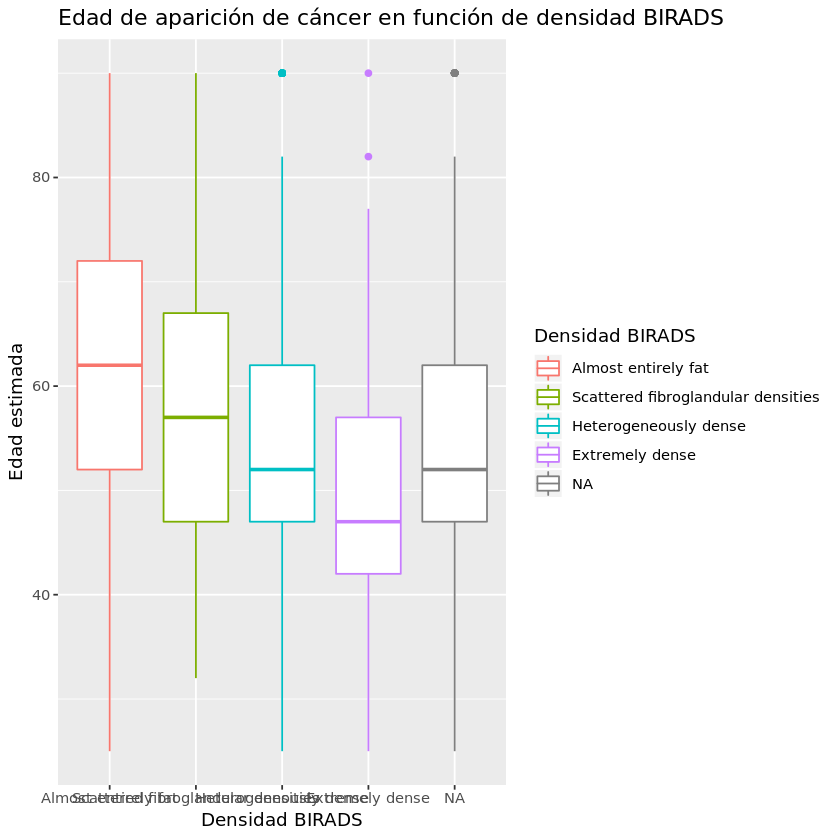

In [42]:
ggplot(data = muestraFactoresRiesgo, aes(x = BIRADS_breast_density, y = estimated_age, color = BIRADS_breast_density)) +
    ggtitle("Edad de aparición de cáncer en función de densidad BIRADS") +
    scale_color_discrete(name = "Densidad BIRADS") + 
    xlab("Densidad BIRADS") +
    ylab("Edad estimada") +
    geom_boxplot()

¿Existe una evidencia estadística significativa para decir que la edad en la que se detecta el cancer depende de la densidad del cancer (BIRADS)?

¿Que test habría que aplicar?

In [118]:
# Se realiza test de shapiro para comprobar si las muestras siguen una distribución normal

shapiro.test(muestraFactoresRiesgo[muestraFactoresRiesgo$BIRADS_breast_density == "Almost entirely fat",]$estimated_age)
shapiro.test(muestraFactoresRiesgo[muestraFactoresRiesgo$BIRADS_breast_density == "Scattered fibroglandular densities",]$estimated_age)
shapiro.test(muestraFactoresRiesgo[muestraFactoresRiesgo$BIRADS_breast_density == "Heterogeneously dense",]$estimated_age)
shapiro.test(muestraFactoresRiesgo[muestraFactoresRiesgo$BIRADS_breast_density == "Extremely dense",]$estimated_age)

print("Parece que ninguna sigue una distribución normal, por lo que realizaremos el test de Kruskal-Wallis:")

kruskal.test(estimated_age ~ BIRADS_breast_density, data = muestraFactoresRiesgo)

print("Como se observa en el test, con el p-value tan bajo, se puede concluir que no hay evidencia estadística significativa para relacionar la edad cuando se detecta el cáncer con el tipo de BIRADS")


	Shapiro-Wilk normality test

data:  muestraFactoresRiesgo[muestraFactoresRiesgo$BIRADS_breast_density ==     "Almost entirely fat", ]$estimated_age
W = 0.97771, p-value = 0.0001396



	Shapiro-Wilk normality test

data:  muestraFactoresRiesgo[muestraFactoresRiesgo$BIRADS_breast_density ==     "Scattered fibroglandular densities", ]$estimated_age
W = 0.96388, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  muestraFactoresRiesgo[muestraFactoresRiesgo$BIRADS_breast_density ==     "Heterogeneously dense", ]$estimated_age
W = 0.95342, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  muestraFactoresRiesgo[muestraFactoresRiesgo$BIRADS_breast_density ==     "Extremely dense", ]$estimated_age
W = 0.93239, p-value = 1.967e-09


[1] "Parece que ninguna sigue una distribución normal, por lo que realizaremos el test de Kruskal-Wallis:"



	Kruskal-Wallis rank sum test

data:  estimated_age by BIRADS_breast_density
Kruskal-Wallis chi-squared = 156.19, df = 3, p-value < 2.2e-16


[1] "Como se observa en el test, con el p-value tan bajo, se puede concluir que no hay evidencia estadística significativa para relacionar la edad cuando se detecta el cáncer con el tipo de BIRADS"


#### Tablas de contingencia: BIRADS

¿Todos los  tipos de cancer (BIRADS) son igual de probables? ¿Con que test lo comprobarías?

In [112]:
tablaBirads <- table(muestraFactoresRiesgo$BIRADS_breast_density)
chiTest <- chisq.test(tablaBirads)
chiTest

print("Con un valor de p-value tan pequeño se puede decir que no son igual de probables")




	Chi-squared test for given probabilities

data:  tablaBirads
X-squared = 1816.3, df = 3, p-value < 2.2e-16


[1] "Con un valor de p-value tan pequeño se puede decir que no son igual de probables"


¿Cual es el tipo de cancer (BIRADS) más común? ¿Con qué proporción?

In [113]:
tablaBirads

proporcionScattered <- round(tablaBirads[2]/sum(tablaBirads) * 100, 2)

print(paste("Vemos como el más común es 'Scattered fibroglandular densities' con una proporción del", proporcionScattered,"%"))



               Almost entirely fat Scattered fibroglandular densities 
                               297                               1665 
             Heterogeneously dense                    Extremely dense 
                              1451                                256 

[1] "Vemos como el más común es 'Scattered fibroglandular densities' con una proporción del 45.38 %"


¿Depende el tipo de cancer (BIRADS) de si ha habido o no antecedentes familiares?

In [85]:
tablaBiradsAntecedentes <- table(muestraFactoresRiesgo$BIRADS_breast_density, muestraFactoresRiesgo$first_degree_hx)
tablaBiradsAntecedentes

testBiradsAntecedentes <- chisq.test(tablaBiradsAntecedentes)
testBiradsAntecedentes

print(paste("Con un valor relativamente alto de p-value", testBiradsAntecedentes$p.value, "podemos decir que no hay dependencia entre los antecedentes familiares y el tipo de cáncer BIRADS"))

                                    
                                       No   Sí
  Almost entirely fat                 223   56
  Scattered fibroglandular densities 1324  248
  Heterogeneously dense              1135  229
  Extremely dense                     190   45


	Pearson's Chi-squared test

data:  tablaBiradsAntecedentes
X-squared = 4.2475, df = 3, p-value = 0.236


[1] "Con un valor relativamente alto de p-value 0.235951995918296 podemos decir que no hay dependencia entre los antecedentes familiares y el tipo de cáncer BIRADS"


¿Depende el tipo de cancer BIRADS del grupo étnico?

In [96]:
tablaBiradsEtnia <- table(muestraFactoresRiesgo$BIRADS_breast_density, muestraFactoresRiesgo$race_eth)
tablaBiradsEtnia

# Realizamos el test con la opción de simular p-value, por que R da un warning por considerar que
# el tamaño de la muestra es pequeño
testBiradsEtnia <- chisq.test(tablaBiradsEtnia, simulate.p.value = TRUE)
testBiradsEtnia

# Vemos que el p-value está muy lejos del umbral del 0.05. Si hubiese estado más próximo, y se hubiese requerido
# hilar más fino, se podría haber pasado el test de Fisher que funciona mejor para muestras más pequeñas.

print(paste("Con un valor de p-value tan bajo", testBiradsEtnia$p.value, "parece que sí que hay dependencia entre los grupos étnicos y el tipo de cáncer BIRADS"))

                                    
                                     Non-Hispanic white Non-Hispanic black
  Almost entirely fat                               204                 23
  Scattered fibroglandular densities               1208                100
  Heterogeneously dense                            1021                 92
  Extremely dense                                   179                 11
                                    
                                     Asian/Pacific Islander Native American
  Almost entirely fat                                    11               1
  Scattered fibroglandular densities                     51               7
  Heterogeneously dense                                  85               6
  Extremely dense                                        29               3
                                    
                                     Hispanic Other/mixed
  Almost entirely fat                      26           2
  Scattered fibrog


	Pearson's Chi-squared test with simulated p-value (based on 2000
	replicates)

data:  tablaBiradsEtnia
X-squared = 48.684, df = NA, p-value = 0.0004998


[1] "Con un valor de p-value tan bajo 0.000499750124937531 parece que sí que hay dependencia entre los grupos étnicos y el tipo de cáncer BIRADS"


¿Cual es la probabilidad (con su margen de error del 95%) de que un *Native American* tenga un cancer de tipo *Almost entirely fat*?

*Aviso*: Cuidado con los NA